# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

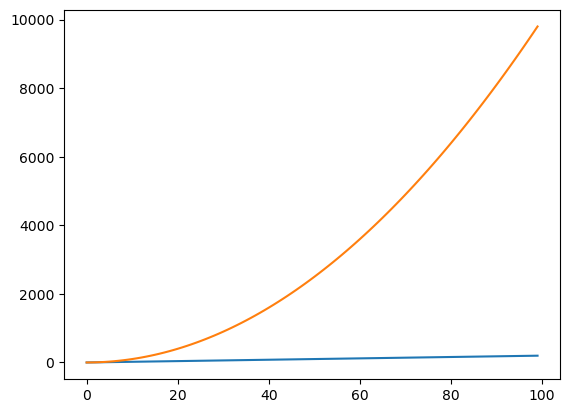

In [3]:
# Method 1
fig, ax = plt.subplots()
ax.plot(x, y, label='y=x*2')
ax.plot(x, z, label='z=x**2')


plt.show()

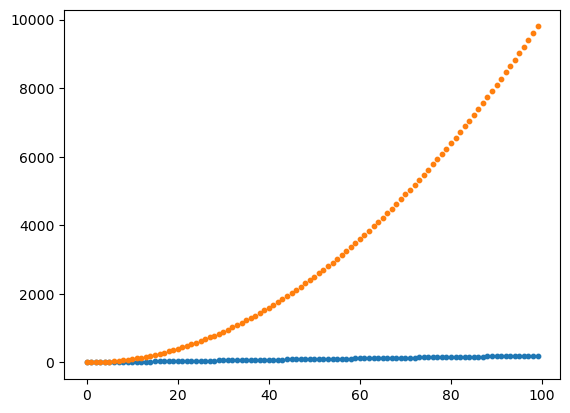

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='y=x*2', s=10)
ax.scatter(x, z, label='z=x**2', s=10)


plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

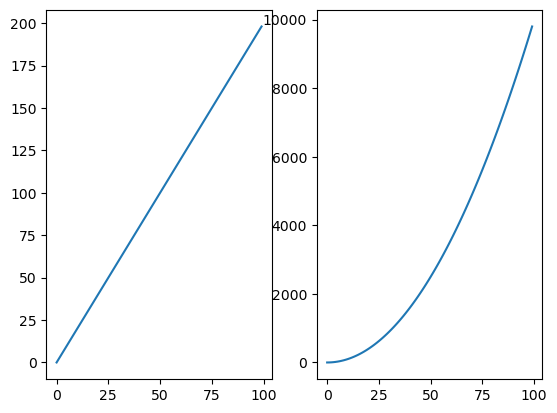

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, y, label='y=x*2')

ax2.plot(x, z, label='z=x**2')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

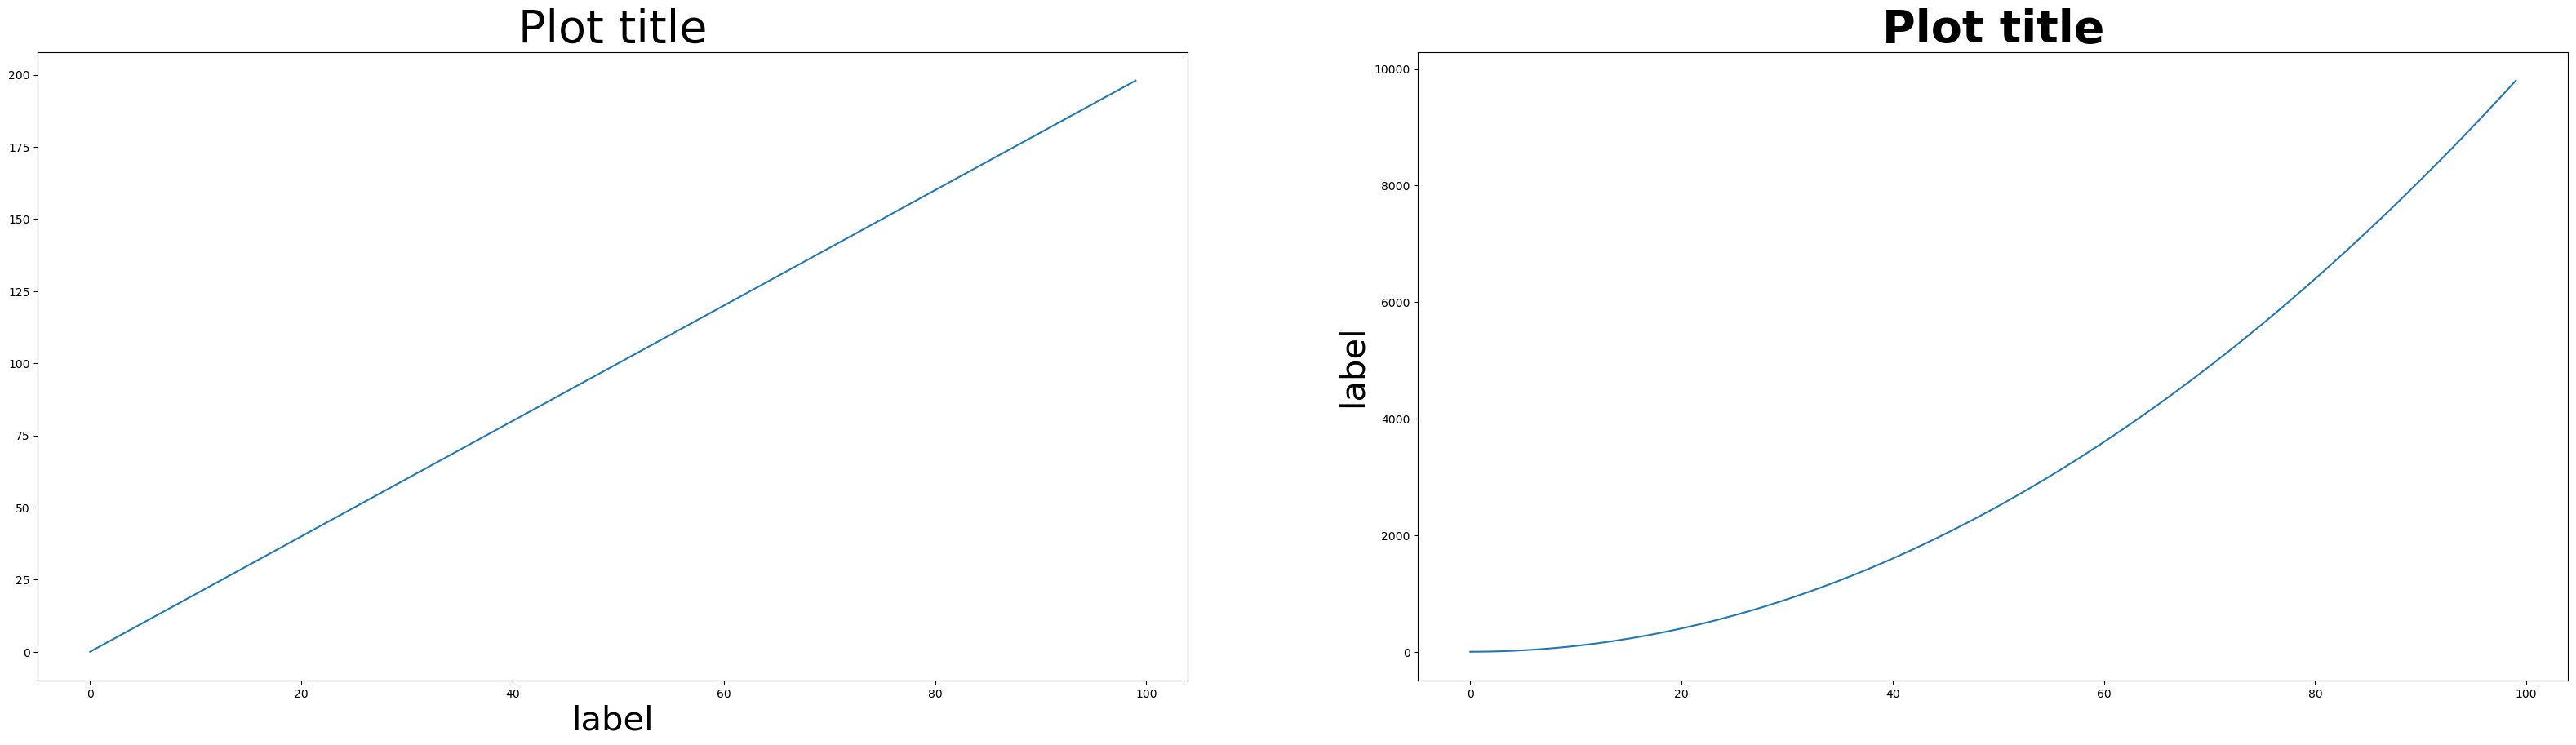

In [6]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(40,10))
ax1.plot(x, y, label='y=x*2')
ax1.set_title("Plot title",fontsize =40)

ax1.set_xlabel("label", fontsize=30)

ax2.plot(x, z, label='z=x**2')
ax2.set_title("Plot title",fontweight="bold",fontsize=40)
ax2.set_ylabel("label",fontsize=30)

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
# your code here
x = np.arange(0,100)
y = x*2
z = np.exp(x)
ax1.plot(x, y, label='y=x^2')
ax1.plot(x, z, label='y=e^x')

ax2.plot(x, y, label='y=x^2')
ax2.plot(x, z, label='y=e^x')
         
ax2.set_xscale('log')
ax2.set_yscale('log')


#### As a bonus challenge, try to add a legend to the plot.

In [8]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
import pandas as pd

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [10]:
fitbit['Months'] = fitbit['Date'].apply(lambda x: x.split('-')[1])
fitbit['Months'] 

0      05
1      05
2      05
3      05
4      05
       ..
362    05
363    05
364    05
365    05
366    05
Name: Months, Length: 367, dtype: object

In [11]:
Median_steps_month = fitbit.groupby('Months')['Steps'].median().reset_index()
Median_steps_month

,Months,Steps
0,01,10366.0
1,02,9235.0
2,03,11122.0
3,04,13846.5
4,05,11998.0
5,06,12935.5
6,07,10644.0
7,08,12213.0
8,09,9343.0
9,10,7865.0


<BarContainer object of 12 artists>

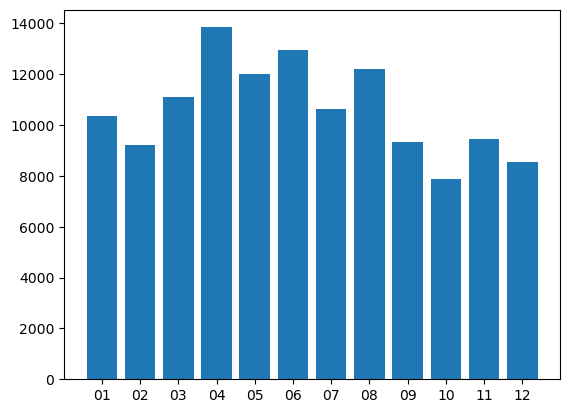

In [12]:
plt.bar(Median_steps_month['Months'], Median_steps_month['Steps'])

In [13]:
fitbit['weekend'] = fitbit['Work_or_Weekend']
fitbit['weekend']

0      1
1      0
2      0
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    0
Name: weekend, Length: 367, dtype: int64

In [14]:
median_steps_weekend = fitbit[fitbit['weekend'] == 1]['Steps'].median()
median_steps_workday = fitbit[fitbit['weekend'] == 0]['Steps'].median()

median_steps_weekend


10445.5

In [15]:
median_steps_workday

9998.0

<BarContainer object of 2 artists>

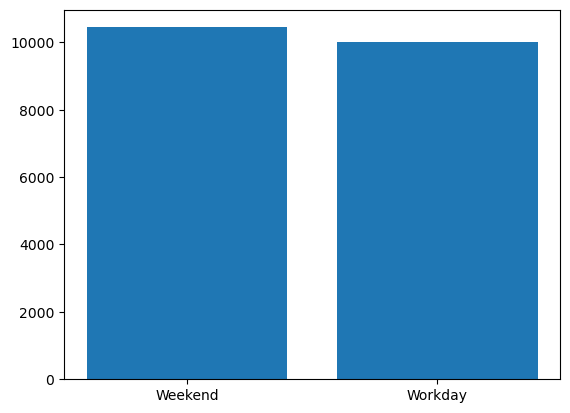

In [16]:
median_steps_weekend_vs_workday=plt.bar(['Weekend', 'Workday'], [median_steps_weekend, median_steps_workday])
median_steps_weekend_vs_workday

In [17]:
plt.savefig('median_steps_weekend_vs_workday')

<Figure size 640x480 with 0 Axes>

In [18]:
#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

SyntaxError: invalid syntax (3885803314.py, line 3)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for feature in features:
    plt.scatter(fitbit[feature], fitbit['Steps'])
    plt.xlabel(feature)
    plt.ylabel('Steps')
    plt.title(f'{feature} vs Steps')
    plt.show()






## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [20]:
# your code here
titanic=pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


In [21]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
numerical_vars = titanic.select_dtypes(include=['int64', 'float64'])
numerical_vars

In [ ]:
# CATEGORICAL VARIABLES
categorical_vars=titanic.select_dtypes(include=[object])
categorical_vars

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
import matplotlib.pyplot as plt

plt=categorical_vars

plt.style.use('classic')
plt.figure(figsize=(12,6))

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 34.,  22.,  16.,  17.,  17.,  44.,  66., 105., 155.,  80., 134.,
        133.,  91.,  71.,  58.,  46.,  45.,  45.,  33.,  19.,  23.,  11.,
         17.,  14.,   4.,   1.,   5.,   1.,   1.,   1.]),
 array([ 0.17 ,  2.831,  5.492,  8.153, 10.814, 13.475, 16.136, 18.797,
        21.458, 24.119, 26.78 , 29.441, 32.102, 34.763, 37.424, 40.085,
        42.746, 45.407, 48.068, 50.729, 53.39 , 56.051, 58.712, 61.373,
        64.034, 66.695, 69.356, 72.017, 74.678, 77.339, 80.   ]),
 <BarContainer object of 30 artists>)

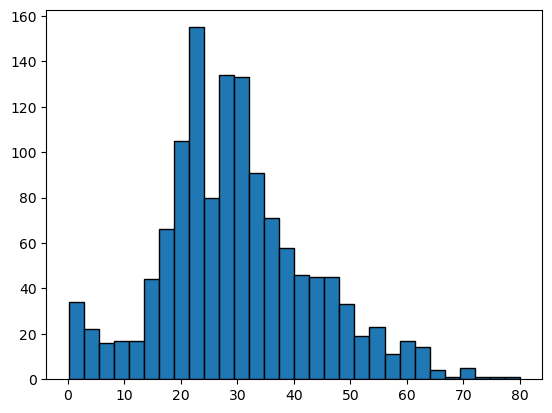

In [22]:
plt.hist(titanic['Age'], bins=30, edgecolor='black')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

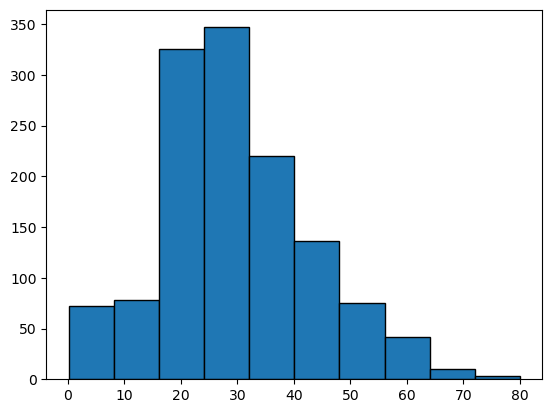

In [23]:
plt.hist(titanic['Age'], bins=10, edgecolor='black')

(array([ 51.,  21.,  25.,  53., 123., 203., 178., 169., 150.,  70.,  68.,
         68.,  47.,  28.,  21.,  21.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <BarContainer object of 20 artists>)

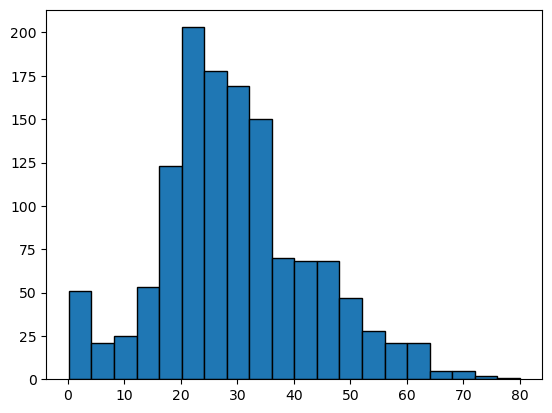

In [24]:
plt.hist(titanic['Age'], bins=20, edgecolor='black')

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

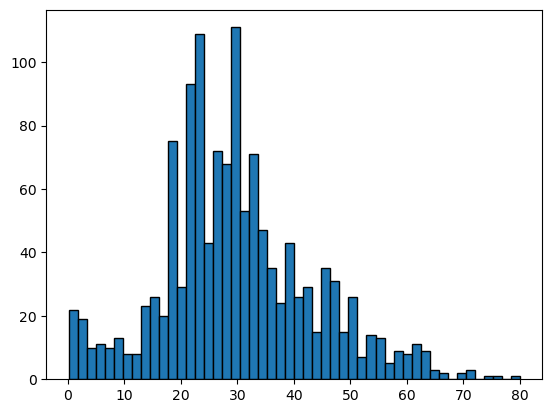

In [25]:
plt.hist(titanic['Age'], bins=50, edgecolor='black')

#### How does the bin size affect your plot?

In [ ]:
 it affected the appearance of the  histogram plot and  the interpretation of the distribution it represents

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

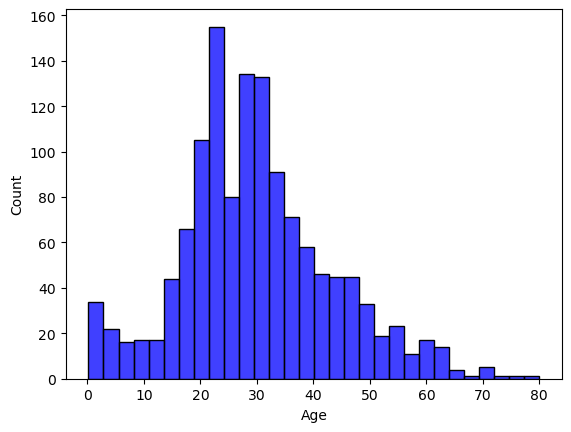

In [28]:
import seaborn as sns
sns.histplot(titanic['Age'], color='blue')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

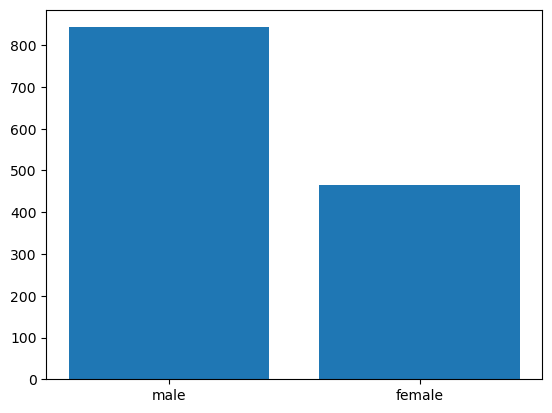

In [30]:
gender_counts = titanic['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

C:\Users\Rui Almeida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

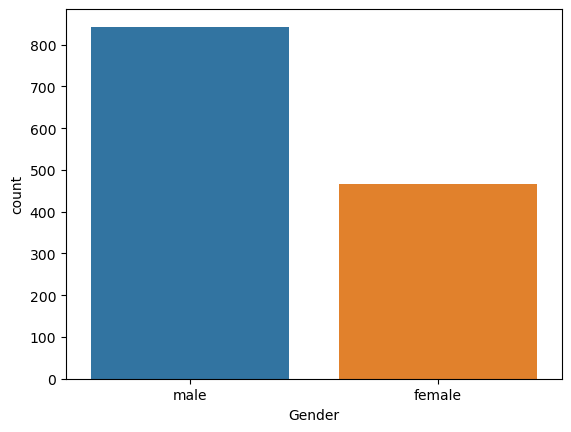

In [32]:
sns.countplot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

C:\Users\Rui Almeida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

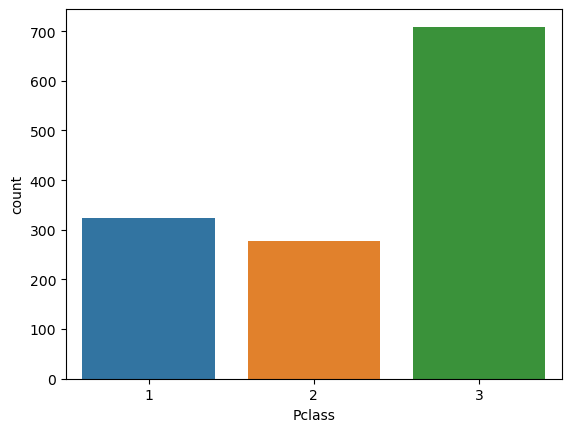

In [33]:
sns.countplot(titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

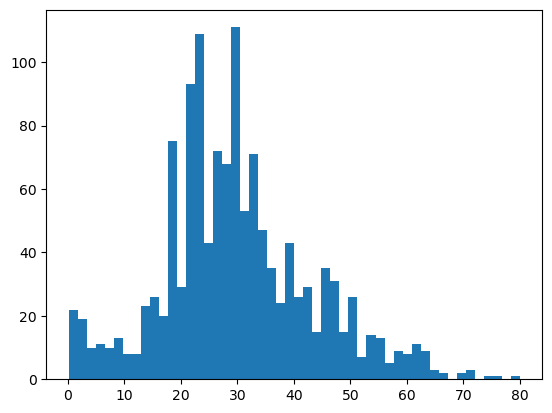

In [38]:
plt.hist(x=titanic['Age'], bins=50)

In [ ]:
It follows a positive distribution

#### What does the last plot tell you about the feature `Age`?

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

C:\Users\Rui Almeida\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age'>

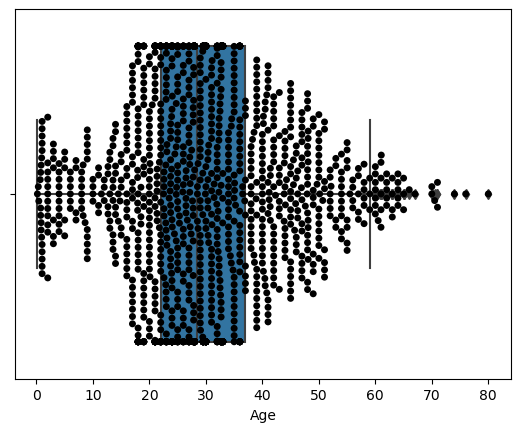

In [39]:
sns.boxplot(x=titanic['Age'])
sns.swarmplot(x=titanic['Age'], color='black')

In [ ]:
###im not understanding this one

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

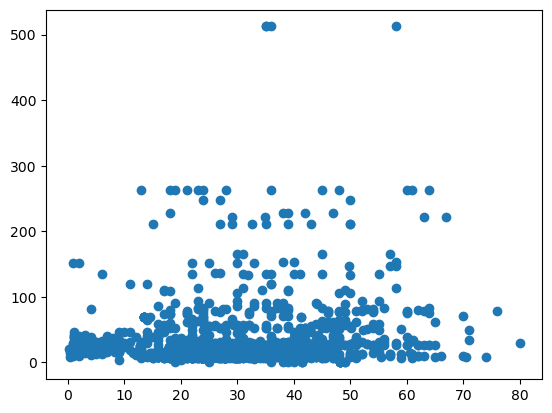

In [40]:
plt.scatter(titanic['Age'], titanic['Fare'])


<AxesSubplot:xlabel='Age', ylabel='Fare'>

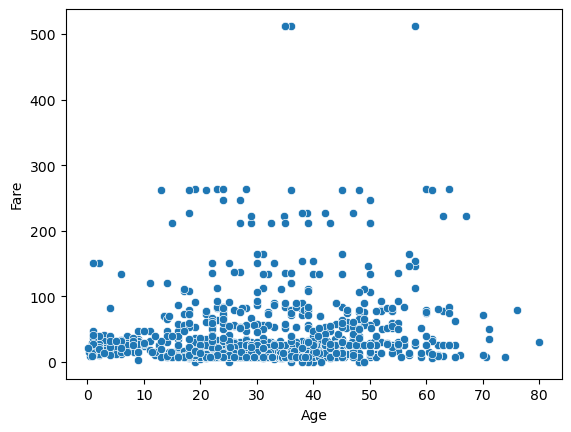

In [44]:
sns.scatterplot(x='Age', y='Fare', data=titanic)

#### Plot the correlation matrix using seaborn.

In [46]:
corr_matrix = titanic.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


<AxesSubplot:>

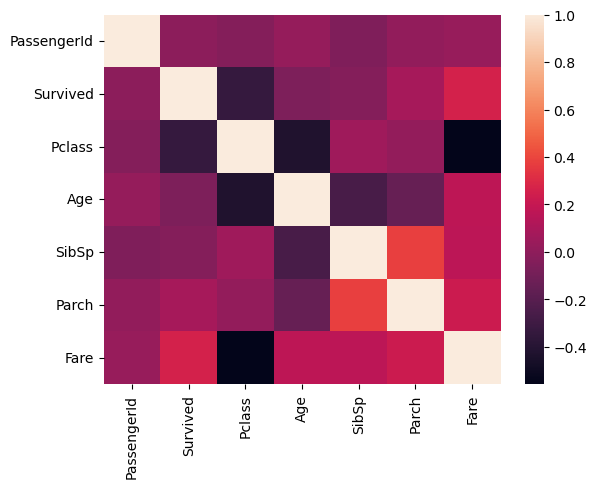

In [50]:
sns.heatmap(corr_matrix)

#### What are the most correlated features?

In [ ]:
#the sibsp,Parch and fare

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

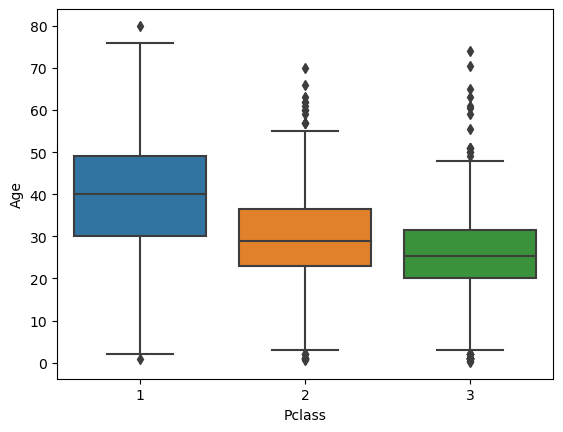

In [51]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

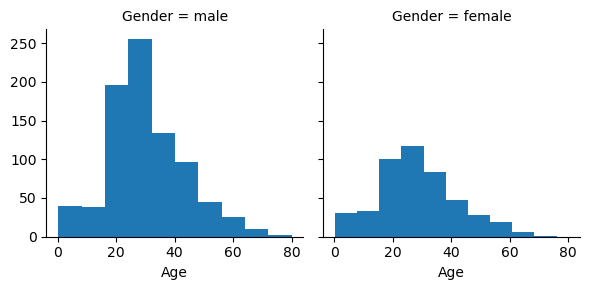

In [53]:
g = sns.FacetGrid(titanic, col='Gender')
g.map(plt.hist, 'Age')